# Playing around
Trying to intuitively understand Noise Interferometry in a free medium

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from NI_simulation.modules import ni_sim
from scipy import interpolate
import sys
import pandas as pd
from scipy import signal
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

In [14]:
# create sources
theta = 180
x = 10000*np.cos(np.deg2rad(theta))
y = 10000*np.sin(np.deg2rad(theta))

sources = ni_sim.source_distribution2D().distant_uniform(3500, 20000, 1000, label='gauss')

In [15]:
env = ni_sim.environment(sources, time_length=600, frequencies = np.linspace(1,20,20))

(-21000.0, 21000.0)

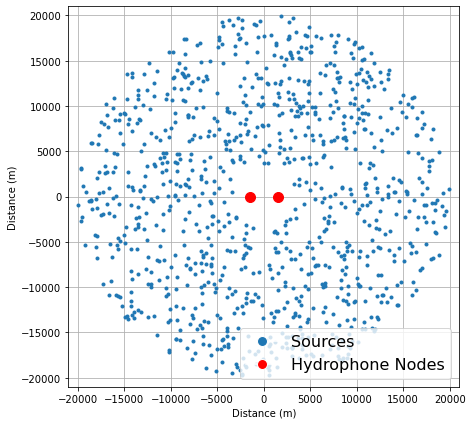

In [16]:
env.plot_env()
plt.xlim([-21000,21000])
plt.ylim([-21000,21000])

In [ ]:
t, R = env.get_correlations(verbose=True, correlation_type='all', chunksize=5)

  0%|          | 2/1000 [00:09<1:19:02,  4.75s/it]Process ForkPoolWorker-474:
Traceback (most recent call last):
  1%|          | 11/1000 [00:18<23:36,  1.43s/it]   File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
_pickle.UnpicklingError: invalid load key, '\xef'.
Process ForkPoolWorker-483:
Traceback (most recent call last):
  File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.9/multipr

In [ ]:
plt.plot(env.tau, R)
plt.xlim([-10,10])

## Simulate single point source as function of bearing

(-21000.0, 21000.0)

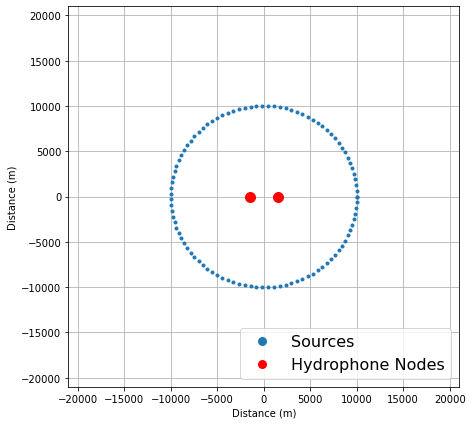

In [61]:
sources = ni_sim.source_distribution2D().uniform_circular(10000, (0,0), 100, label='gauss')
env = ni_sim.environment(sources, time_length=600)
env.plot_env()
plt.xlim([-21000,21000])
plt.ylim([-21000,21000])

In [68]:
t, R = env.get_correlations(correlation_type='all', verbose=True)

R = np.array(R)

72
100


100%|██████████| 100/100 [00:34<00:00,  2.90it/s]


Text(0, 0.5, 'bearing [degrees]')

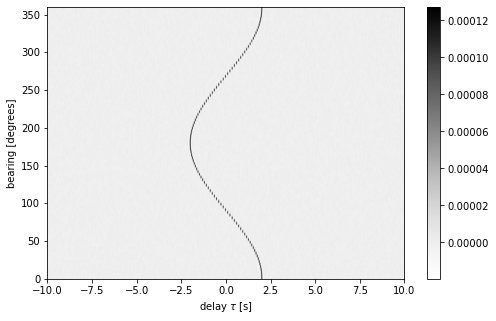

In [70]:
plt.figure(figsize=(8,5))
plt.imshow(R, aspect='auto', extent=[-600,600,0,360], cmap='Greys')
plt.xlim([-10,10])
plt.colorbar()
plt.xlabel('delay $\\tau$ [s]')
plt.ylabel('bearing [degrees]')